In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       # analysis tool
from sklearn.model_selection import train_test_split

In [0]:
# Prepare dataset

cars_customers_data = spark.read.table("default.new_cleaned_carscustomer_data_pradeep")

df_table=cars_customers_data.toPandas()
df = pd.DataFrame(df_table)
df.head()

#print("Dataset", df)

,TotalChildren,NumberChildrenAtHome,NumberOfPurchases,ProfitGenerated,Age,MaritalStatus_ S,YearlyIncome_ 25001-50000,YearlyIncome_ 50001-75000,YearlyIncome_ 75001-100000,YearlyIncome_ greater than 100000,Gender_ M,Education_ Graduate Degree,Education_ High School,Education_ Partial College,Education_ Partial High School,Occupation_ Management,Occupation_ Manual,Occupation_ Professional,Occupation_ Skilled Manual,HomeOwner_ True,CommuteDistance_ 1-2 Miles,CommuteDistance_ 10+ Miles,CommuteDistance_ 2-5 Miles,CommuteDistance_ 5-10 Miles
0,1.705840,2.554599,2.753732,-0.239634,-0.658761,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,-1.207835,-0.704899,-1.253591,1.456773,-0.405635,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0.540370,1.250800,-0.251760,-0.365055,-0.321260,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.123105,1.902699,0.750071,0.448947,-0.321260,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,-1.207835,-0.704899,-1.253591,1.714110,-0.321260,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
y = df['ProfitGenerated']
X = df.drop(['ProfitGenerated'], axis=1)

print(X)

      TotalChildren  ...  CommuteDistance_ 5-10 Miles 
0          1.705840  ...                             0
1         -1.207835  ...                             1
2          0.540370  ...                             0
3          1.123105  ...                             0
4         -1.207835  ...                             1
...             ...  ...                           ...
9995      -1.207835  ...                             0
9996      -1.207835  ...                             0
9997      -0.625100  ...                             0
9998      -0.625100  ...                             0
9999      -0.042365  ...                             0

[10000 rows x 23 columns]


In [0]:
#y = df['NumberOfPurchases']
#.values.reshape(-1, 1)
#X = df.drop(['NumberOfPurchases'], axis=1)
#X = df[['NumberChildrenAtHome', 'TotalChildren', 'BirthDate', 'YearlyIncome']]
#X = df[['NumberChildrenAtHome', 'TotalChildren', 'BirthDate', 'YearlyIncome', 'Education', 'CommuteDistance',   'HomeOwner', 'Occupation' ]]

In [0]:
# Train and split the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [0]:
# Predict the new result

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y.values.reshape(-1,1), y.values.reshape(-1,1)),1))

[[-0.24 -0.24]
 [ 1.46  1.46]
 [-0.37 -0.37]
 ...
 [-1.17 -1.17]
 [-1.26 -1.26]
 [-1.21 -1.21]]


9394    0.020077
898     0.000740
2398    0.077008
5906    0.045599
2343   -0.199015
          ...   
1037    0.006674
2899    0.007532
9549   -0.004418
2740   -0.003984
6690    0.004217
Name: ProfitGenerated, Length: 2000, dtype: float64


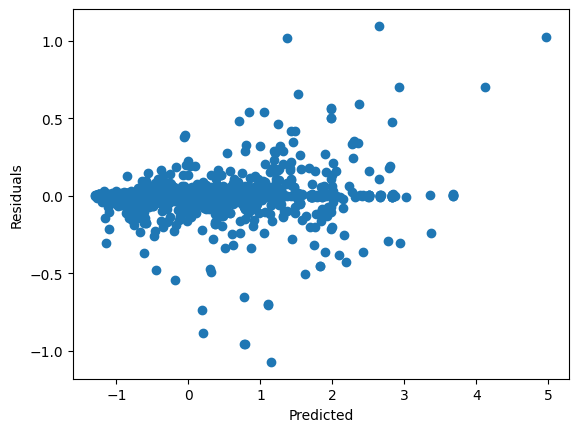

R2 Score: 0.9878444409256022
Adjusted R2 Score: 0.9877029541549994


In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

residuals = y_test - y_pred

print(residuals)
plt.scatter(y_test, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("R2 Score:", r2_score(y_test, y_pred))
print("Adjusted R2 Score:", adjusted_r2)

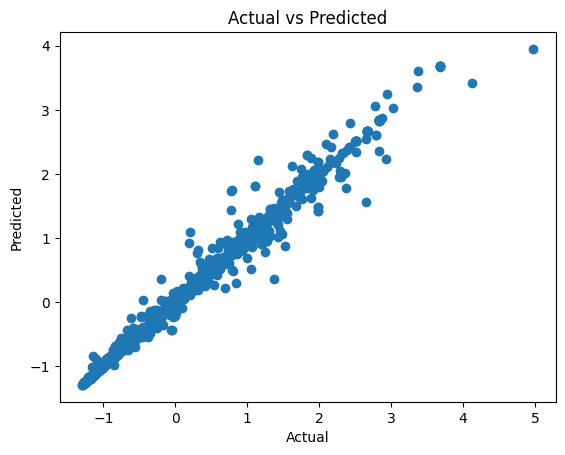

In [0]:
# Graphical representation of the model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()